In [59]:
# file from https://github.com/BatchDrake/ASignInSpace/blob/master/Candidates/artifacts/data17square.txt
with open('data17square.txt', 'r') as t:
    data = t.read()

(-0.5, 255.5, 255.5, -0.5)

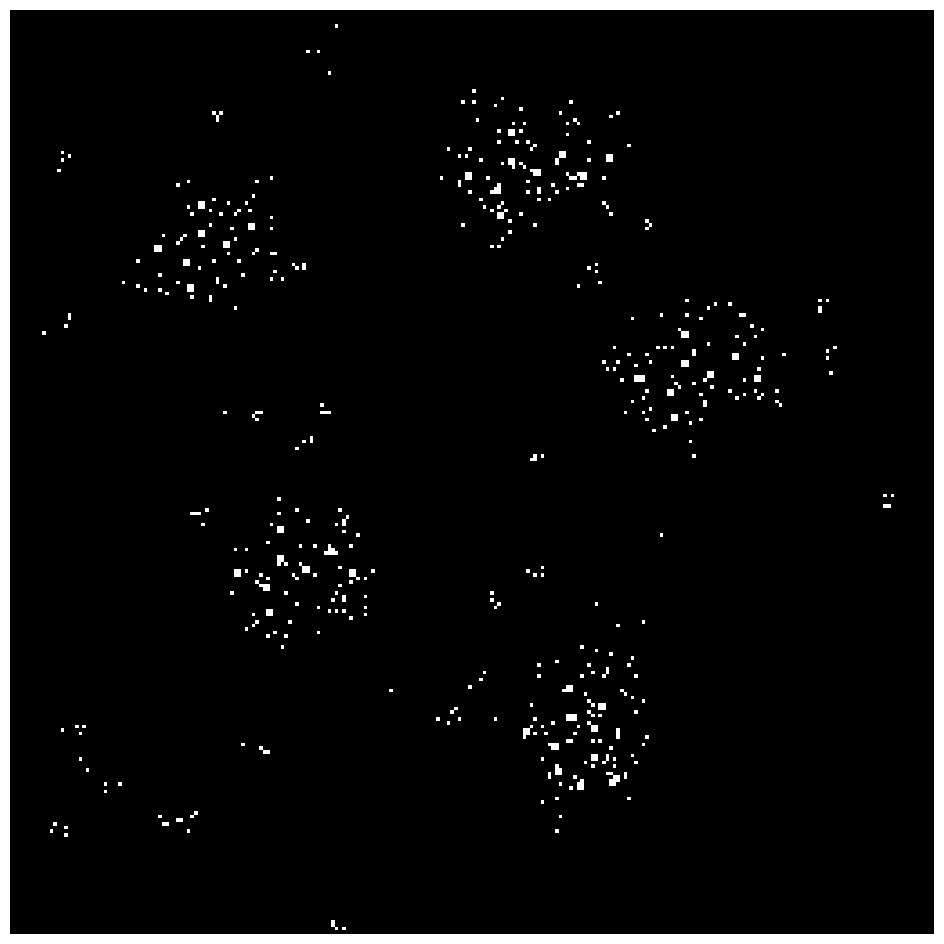

In [60]:
import matplotlib.pyplot as plt 
from PIL import Image
im = Image.new(mode="L", size=(256,256))
for x in range(256):
    for y in range(256):
        d = data[x*256+y]
        v = 0
        if d == "1":
            v = 255
        im.putpixel((x,y), v)
plt.figure(figsize=(12,12))
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.axis('image')


(-0.5, 255.5, 255.5, -0.5)

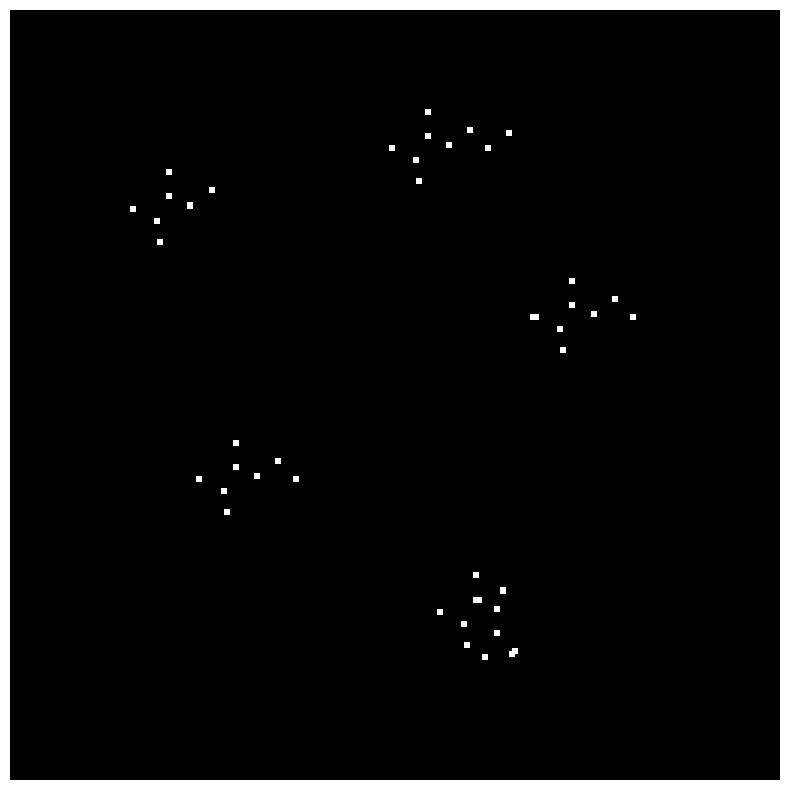

In [61]:
import matplotlib.pyplot as plt 
from PIL import Image
# filter out the squares as a separate image
im_squares = Image.new(mode="L", size=(256,256))
squares = list()
for x in range(255):
    for y in range(255):
        d1 = data[(x)*256+(y)]
        d2 = data[(x)*256+(y+1)]
        d3 = data[(x+1)*256+(y)]
        d4 = data[(x+1)*256+(y+1)]
        v = 0
        if d1 == "1" and d2 == "1" and d3 == "1" and d4 == "1":
            v = 255
            squares.append([x, y])
        if im_squares.getpixel((x,y)) == 0:
            im_squares.putpixel((x,y), v)
        if im_squares.getpixel((x+1,y)) == 0:
            im_squares.putpixel((x+1,y), v)
        if im_squares.getpixel((x,y+1)) == 0:
            im_squares.putpixel((x,y+1), v)
        if im_squares.getpixel((x+1,y+1)) == 0:
            im_squares.putpixel((x+1,y+1), v)
plt.figure(figsize=(10,10))
plt.imshow(im_squares, cmap='gray')
plt.axis('off')
plt.axis('image')


(-0.5, 255.5, 255.5, -0.5)

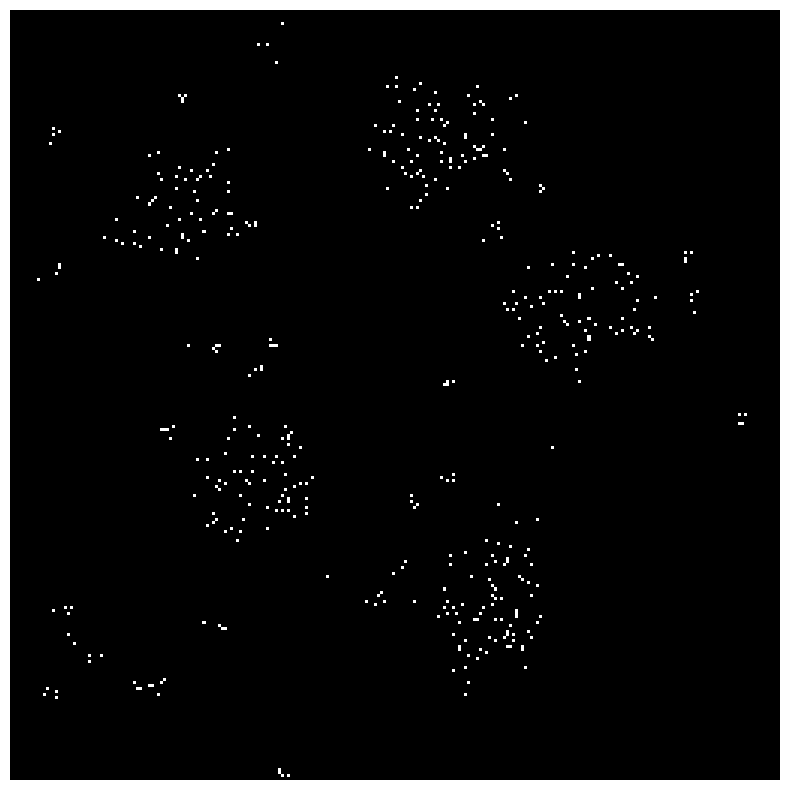

In [62]:
import matplotlib.pyplot as plt 
from PIL import Image
# filter out the non-squares as a separate image
im_non_squares = Image.new(mode="L", size=(256,256))
# draw everything first
#for x in range(256):
#    for y in range(256):
#        d = data[x*256+y]
#        v = 0
#        if d == "1":
#            v = 255
#        im_non_squares.putpixel((x,y), v)
# now remove all squares
non_squares = list()
squares_pixel = list()
for x in range(255):
    for y in range(255):
        d1 = data[(x)*256+(y)]
        d2 = data[(x)*256+(y+1)]
        d3 = data[(x+1)*256+(y)]
        d4 = data[(x+1)*256+(y+1)]
        v = 0
        if d1 == "1" and d2 == "1" and d3 == "1" and d4 == "1":
            v = 0
            squares_pixel.append((x)*256+(y))
            squares_pixel.append((x)*256+(y+1))
            squares_pixel.append((x+1)*256+(y))
            squares_pixel.append((x+1)*256+(y+1))
        else:
            if data[(x)*256+(y)] == "1" and ((x)*256+(y)) not in squares_pixel:
                non_squares.append([x, y])
                im_non_squares.putpixel((x,y), 255)

plt.figure(figsize=(10,10))
plt.imshow(im_non_squares, cmap='gray')
plt.axis('off')
plt.axis('image')

In [63]:
# add a progress bar
from tqdm import tqdm
# find the largest repeating pattern in the coordinates of the squares
ps = [[x] for x in squares]

def compute_distances_map(ps):
    ret = []
    ret_max = []
    d = {}
    threshold = 3 # at least three copies around
    for constellations in tqdm(ps, desc="Constellations"):
        cons_sorted = sorted(constellations , key=lambda k: [k[1], k[0]])
        s = cons_sorted[0]
        r = []
        for p in cons_sorted:
            r.append([p[0]-s[0], p[1]-s[1]])
        key = str(r)
        if key in d:
            d[key] += 1
        else:
            d[key] = 1
    max_count = max(d.values())
    # we should threshold the counts and return only constellations that
    # have at least N=2 members
    for constellations in tqdm(ps, desc="Constellations"):
        cons_sorted = sorted(constellations, key=lambda k: [k[1], k[0]])
        s = cons_sorted[0]
        r = []
        for p in cons_sorted:
            r.append([p[0]-s[0], p[1]-s[1]])
        key = str(r)
        if d[key] > threshold:
            ret.append(cons_sorted)
        if d[key] == max_count:
            ret_max.append(cons_sorted)
    d2 = {}
    for dd in tqdm(d, desc="Threshold"):
        if d[dd] > threshold:
            d2[dd] = d[dd]
    return { 'constellations': ret, 'counts': d2, 'max_constellations': ret_max }

import itertools

# in the first iteration constellations and ps are the same
def merge_one_level(constellations, ps):
    # everyone with everyone else in a map of differences as keys
    ret = list()
    for c1 in tqdm(range(len(constellations)), desc="Merge one level"):
        for c2 in range(len(ps)):
            # merge the two but only take unique elements
            comb = constellations[c1] + ps[c2]
            comb.sort()
            comb = list(comb for comb,_ in itertools.groupby(comb))
            if len(comb) == len(constellations[c1]) + 1:
                if comb not in ret:
                    ret.append(comb)
    return ret

# faster version of the function above
def merge_one_level2(constellations, ps):
    # everyone with everyone else in a map of differences as keys
    ret = list()
    rett = set()
    for c1 in tqdm(range(len(constellations)), desc="Merge one level"):
        for c2 in range(len(ps)):
            # merge the two but only take unique elements
            comb = constellations[c1] + ps[c2]
            comb.sort()
            comb = list(comb for comb,_ in itertools.groupby(comb))
            if len(comb) == len(constellations[c1]) + 1:
                if str(comb) not in rett:
                    ret.append(comb)
                    rett.add(str(comb))
    return ret


In [64]:
ps2 = merge_one_level(ps,ps)
level2 = compute_distances_map(ps2)
print(len(level2['constellations']))
print(level2)

Threshold: 100%|██████████| 795/795 [00:00<00:00, 3734010.84it/s]

182
{'constellations': [[[40, 65], [48, 69]], [[40, 65], [49, 76]], [[52, 53], [40, 65]], [[52, 61], [40, 65]], [[59, 64], [40, 65]], [[40, 65], [62, 155]], [[66, 59], [40, 65]], [[126, 45], [40, 65]], [[40, 65], [142, 199]], [[40, 65], [174, 101]], [[48, 69], [49, 76]], [[52, 53], [48, 69]], [[52, 61], [48, 69]], [[59, 64], [48, 69]], [[66, 59], [48, 69]], [[48, 69], [70, 159]], [[134, 49], [48, 69]], [[48, 69], [150, 203]], [[48, 69], [182, 105]], [[52, 53], [49, 76]], [[52, 61], [49, 76]], [[59, 64], [49, 76]], [[66, 59], [49, 76]], [[49, 76], [71, 166]], [[135, 56], [49, 76]], [[49, 76], [151, 210]], [[49, 76], [183, 112]], [[52, 53], [52, 61]], [[52, 53], [59, 64]], [[52, 53], [66, 59]], [[52, 53], [74, 143]], [[138, 33], [52, 53]], [[52, 53], [154, 187]], [[52, 53], [186, 89]], [[52, 61], [59, 64]], [[66, 59], [52, 61]], [[52, 61], [74, 151]], [[138, 41], [52, 61]], [[52, 61], [154, 195]], [[52, 61], [186, 97]], [[66, 59], [59, 64]], [[59, 64], [81, 154]], [[145, 44], [59, 64]], 

In [65]:
ps3 = merge_one_level(level2['constellations'],ps)
level3 = compute_distances_map(ps3)
print(len(level3['constellations']))
print(level3)

Threshold: 100%|██████████| 6203/6203 [00:00<00:00, 4196333.50it/s]

226
{'constellations': [[[40, 65], [48, 69], [49, 76]], [[52, 53], [40, 65], [48, 69]], [[52, 61], [40, 65], [48, 69]], [[59, 64], [40, 65], [48, 69]], [[66, 59], [40, 65], [48, 69]], [[52, 53], [40, 65], [49, 76]], [[52, 61], [40, 65], [49, 76]], [[59, 64], [40, 65], [49, 76]], [[66, 59], [40, 65], [49, 76]], [[52, 53], [52, 61], [40, 65]], [[52, 53], [59, 64], [40, 65]], [[52, 53], [66, 59], [40, 65]], [[52, 61], [59, 64], [40, 65]], [[66, 59], [52, 61], [40, 65]], [[66, 59], [59, 64], [40, 65]], [[126, 45], [40, 65], [62, 155]], [[40, 65], [62, 155], [142, 199]], [[40, 65], [174, 101], [62, 155]], [[126, 45], [40, 65], [142, 199]], [[126, 45], [40, 65], [174, 101]], [[40, 65], [174, 101], [142, 199]], [[52, 53], [48, 69], [49, 76]], [[52, 61], [48, 69], [49, 76]], [[59, 64], [48, 69], [49, 76]], [[66, 59], [48, 69], [49, 76]], [[52, 53], [52, 61], [48, 69]], [[52, 53], [59, 64], [48, 69]], [[52, 53], [66, 59], [48, 69]], [[52, 61], [59, 64], [48, 69]], [[66, 59], [52, 61], [48, 69]]

In [66]:
ps4 = merge_one_level(level3['constellations'],ps)
level4 = compute_distances_map(ps4)
print(len(level4['constellations']))

Threshold: 100%|██████████| 8668/8668 [00:00<00:00, 4185130.32it/s]

186


In [67]:
ps5 = merge_one_level(level4['constellations'],ps)
level5 = compute_distances_map(ps5)
print(len(level5['constellations']))

Threshold: 100%|██████████| 7077/7077 [00:00<00:00, 4150900.49it/s]

96


In [68]:
ps6 = merge_one_level(level5['constellations'],ps)
level6 = compute_distances_map(ps6)
print(len(level6['constellations']))

Threshold: 100%|██████████| 3627/3627 [00:00<00:00, 4097156.10it/s]

29


In [69]:
ps7 = merge_one_level(level6['constellations'],ps)
level7 = compute_distances_map(ps7)
print(len(level7['constellations']))

Threshold: 100%|██████████| 1090/1090 [00:00<00:00, 3634174.37it/s]

4


In [70]:
ps8 = merge_one_level(level7['constellations'],ps)
level8 = compute_distances_map(ps8)
print(len(level8['constellations']))

Threshold: 100%|██████████| 150/150 [00:00<00:00, 1152281.32it/s]

0


In [71]:
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# create our own version of a colormap (white as second pixel, black as first)
cmap = plt.colormaps["tab20"]
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([0, 0, 0, 1])
colors[1] = np.array([1, 1, 1, 1])
my_cmap = LinearSegmentedColormap.from_list("my_cmap", colors, cmap.N)
multiplier = 6

def p_put_pixel(im, pos, val):
    img1 = ImageDraw.Draw(im)
    shape = [(multiplier*pos[0]-int(multiplier/2), multiplier*pos[1]-int(multiplier/2)), (multiplier*pos[0]+int(multiplier/2), multiplier*pos[1]+int(multiplier/2))]    
    img1.rectangle(shape, fill =val, outline ="white") 

def plot_constellations_grid(constellations, ps):
    im = Image.new(mode="RGB", size=(256*multiplier,256*multiplier))
    # plot background
    for pp in range(256*multiplier):
        for ppp in range(256*multiplier):
            p_put_pixel(im, (pp, ppp), "lightgray")

    # plot all points
    for pp in ps:
        for p in pp:
            p1,p2 = p
            p_put_pixel(im, (p1, p2), "rgb(232,43,123)")
            p_put_pixel(im, (p1+1, p2), "rgb(232,43,123)")
            p_put_pixel(im, (p1, p2+1), "rgb(232,43,123)")
            p_put_pixel(im, (p1+1, p2+1), "rgb(232,43,123)")
    # add the one that repeat the most
    c = 2
    for pp in constellations:
        for p in pp:
            p1,p2 = p
            p_put_pixel(im, (p1,p2), "rgb(32,143,123)")
            p_put_pixel(im, (p1+1,p2), "rgb(32,143,123)")
            p_put_pixel(im, (p1,p2+1), "rgb(32,143,123)")
            p_put_pixel(im, (p1+1,p2+1), "rgb(32,143,123)")
        c += 1

    plt.figure(figsize=(25,25))
    plt.imshow(im, cmap=my_cmap, clim=[0, 20])
    plt.axis('off')
    plt.axis('image')


# plot 4 points
def plot_constellations(constellations, ps):
    im = Image.new(mode="L", size=(256,256))
    # plot all points
    for pp in ps:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), 1)
            im.putpixel((p1+1,p2), 1)
            im.putpixel((p1,p2+1), 1)
            im.putpixel((p1+1,p2+1), 1)
    # add the once that repeat the most
    c = 2
    for pp in constellations:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), c)
            im.putpixel((p1+1,p2), c)
            im.putpixel((p1,p2+1), c)
            im.putpixel((p1+1,p2+1), c)
        c += 1

    plt.figure(figsize=(15,15))
    plt.imshow(im, cmap=my_cmap, clim=[0, 20])
    plt.axis('off')
    plt.axis('image')

# plot single points
def plot_constellations2(constellations, ps):
    im = Image.new(mode="L", size=(256,256))
    # plot all points
    for pp in ps:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), 1)
    # add the once that repeat the most
    c = 2
    for pp in constellations:
        for p in pp:
            p1,p2 = p
            im.putpixel((p1,p2), c)
        c += 1

    plt.figure(figsize=(15,15))
    plt.imshow(im, cmap=my_cmap, clim=[0, 20])
    plt.axis('off')
    plt.axis('image')

def plot_constellations2_grid(constellations, ps):
    im = Image.new(mode="RGB", size=(256*multiplier,256*multiplier))
    # plot background
    for pp in range(256*multiplier):
        for ppp in range(256*multiplier):
            p_put_pixel(im, (pp, ppp), "lightgray")
    # plot all points
    for pp in ps:
        for p in pp:
            p1,p2 = p
            #im.putpixel((p1,p2), 1)
            p_put_pixel(im, (p1, p2), "red")
    # add the once that repeat the most
    c = 2
    for pp in constellations:
        for p in pp:
            p1,p2 = p
            #im.putpixel((p1,p2), c)
            p_put_pixel(im, (p1, p2), "green")
        c += 1

    plt.figure(figsize=(25,25))
    plt.imshow(im, cmap=my_cmap, clim=[0, 20])
    plt.axis('off')
    plt.axis('image')


Plot the largest repeated pattern of 7 large squares. There are 4 of those.

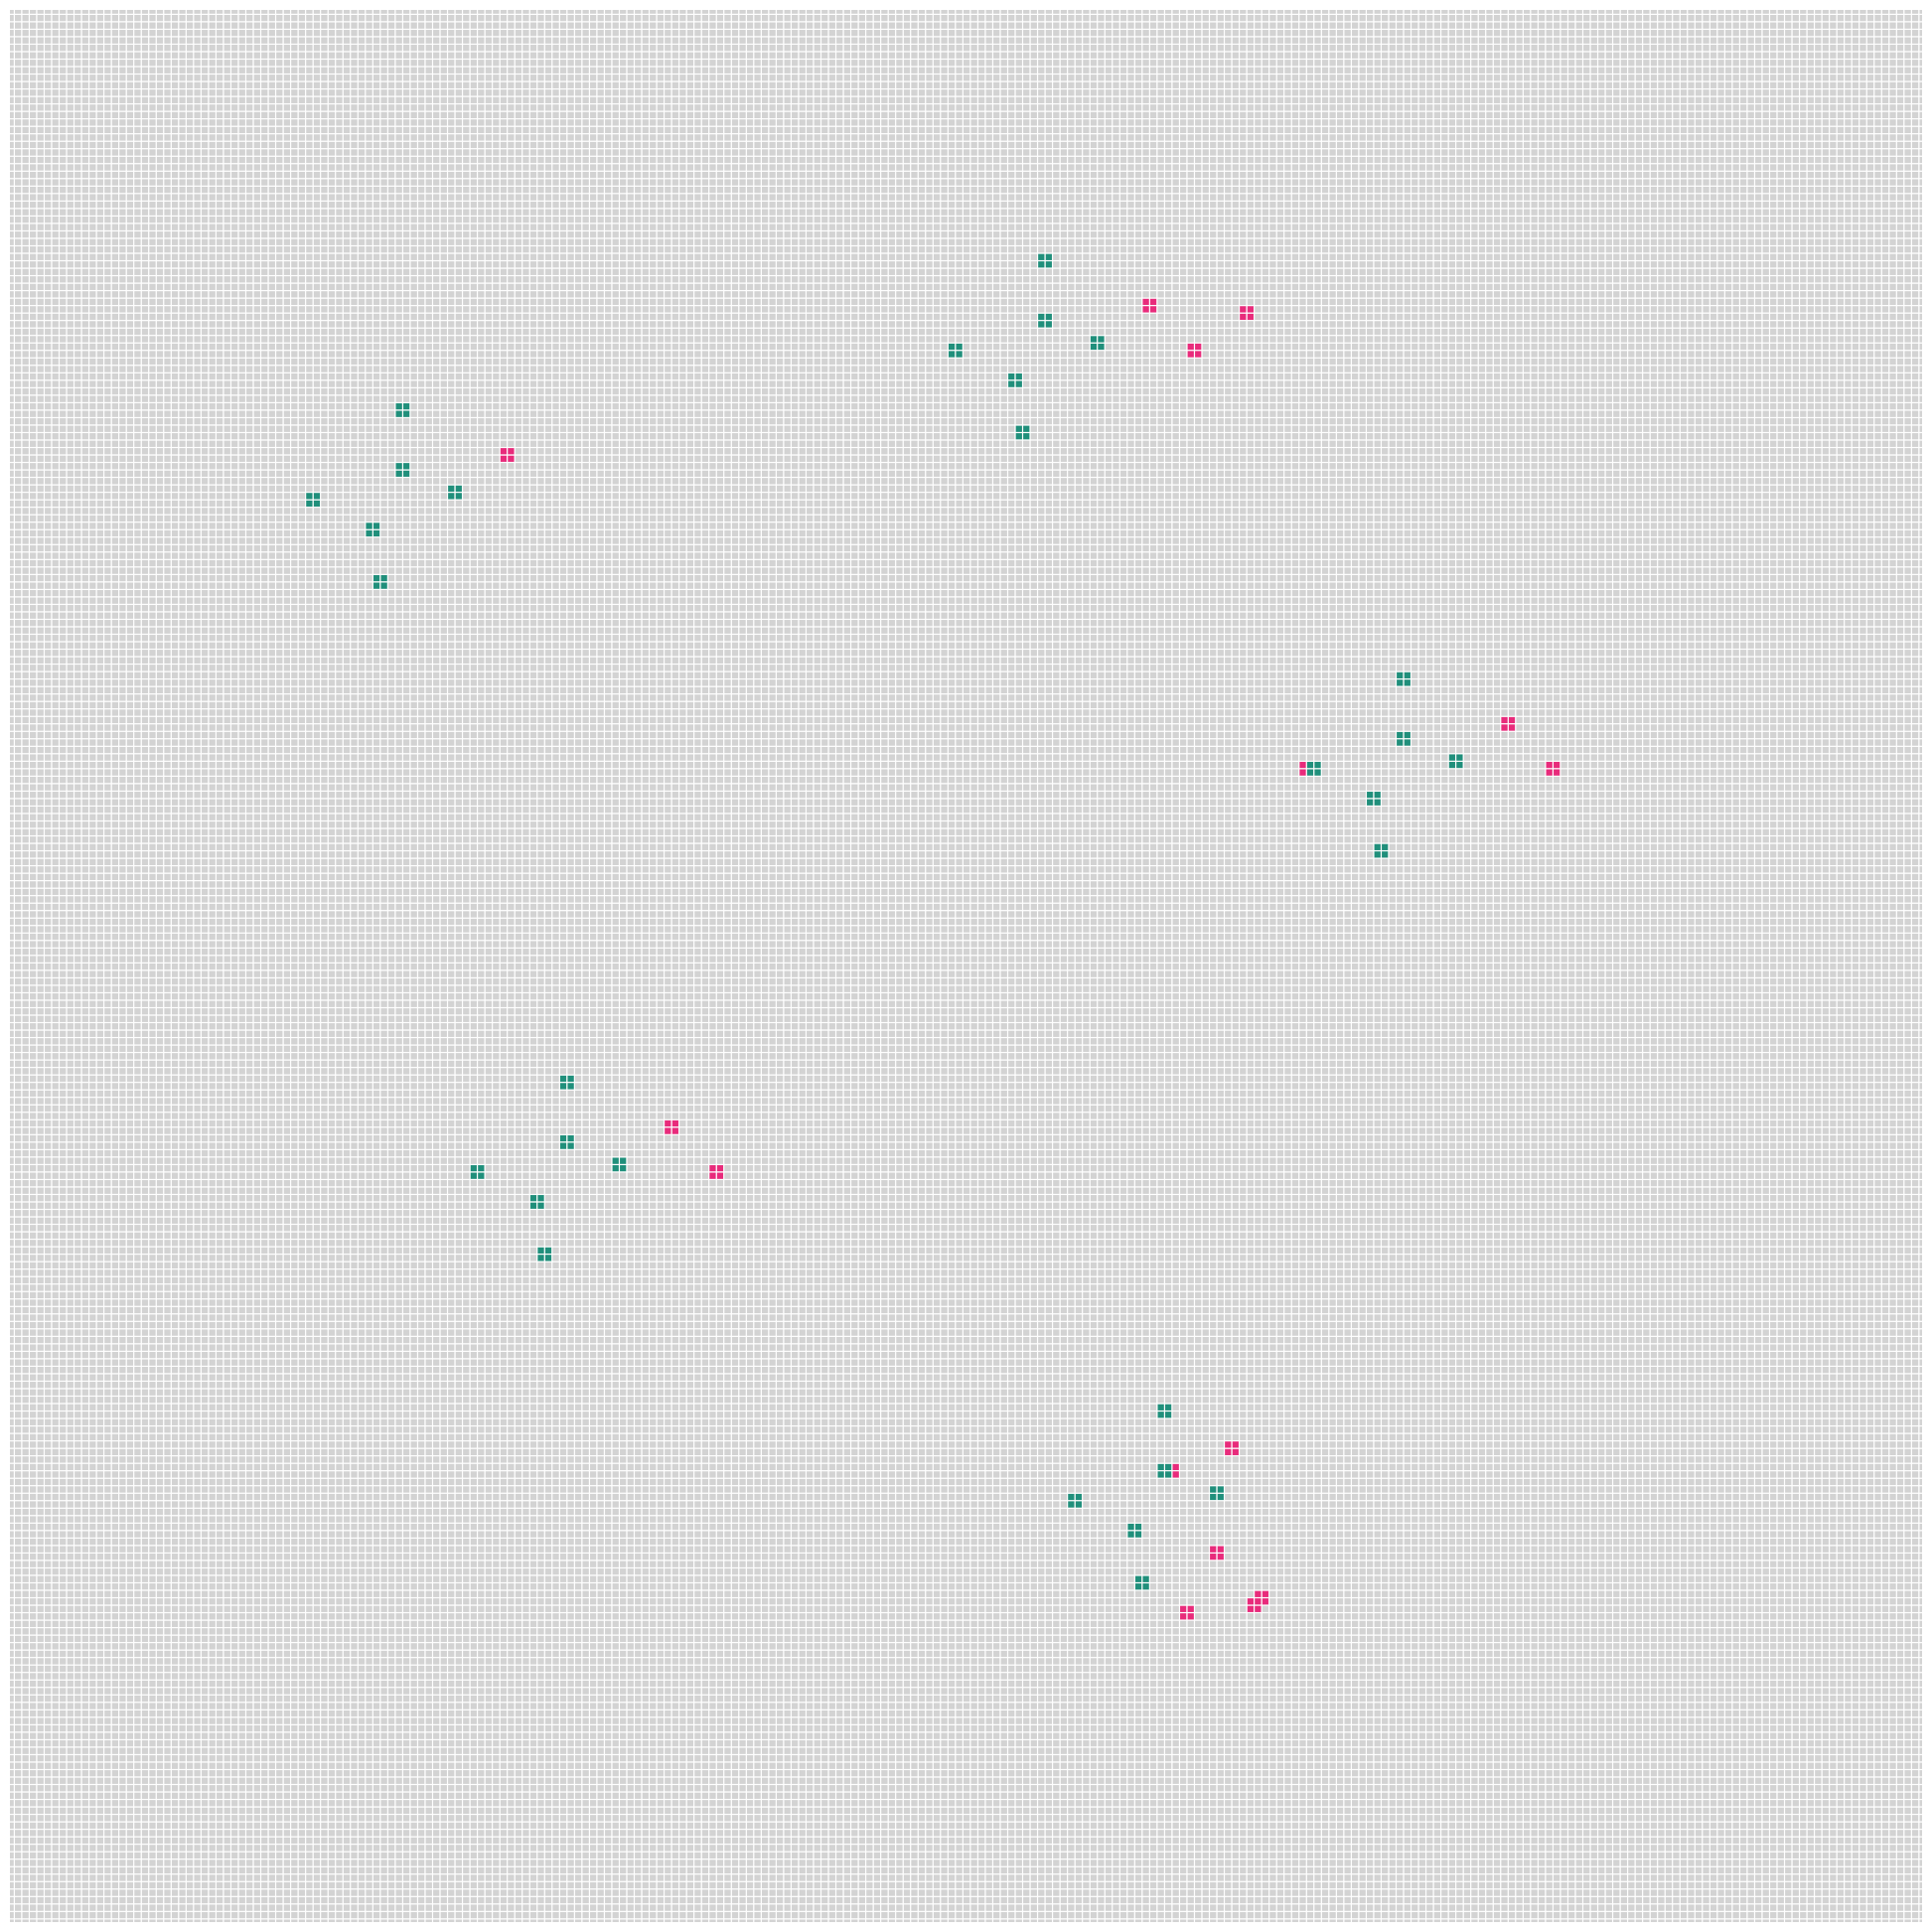

In [72]:
plot_constellations_grid(level6['max_constellations'], ps)

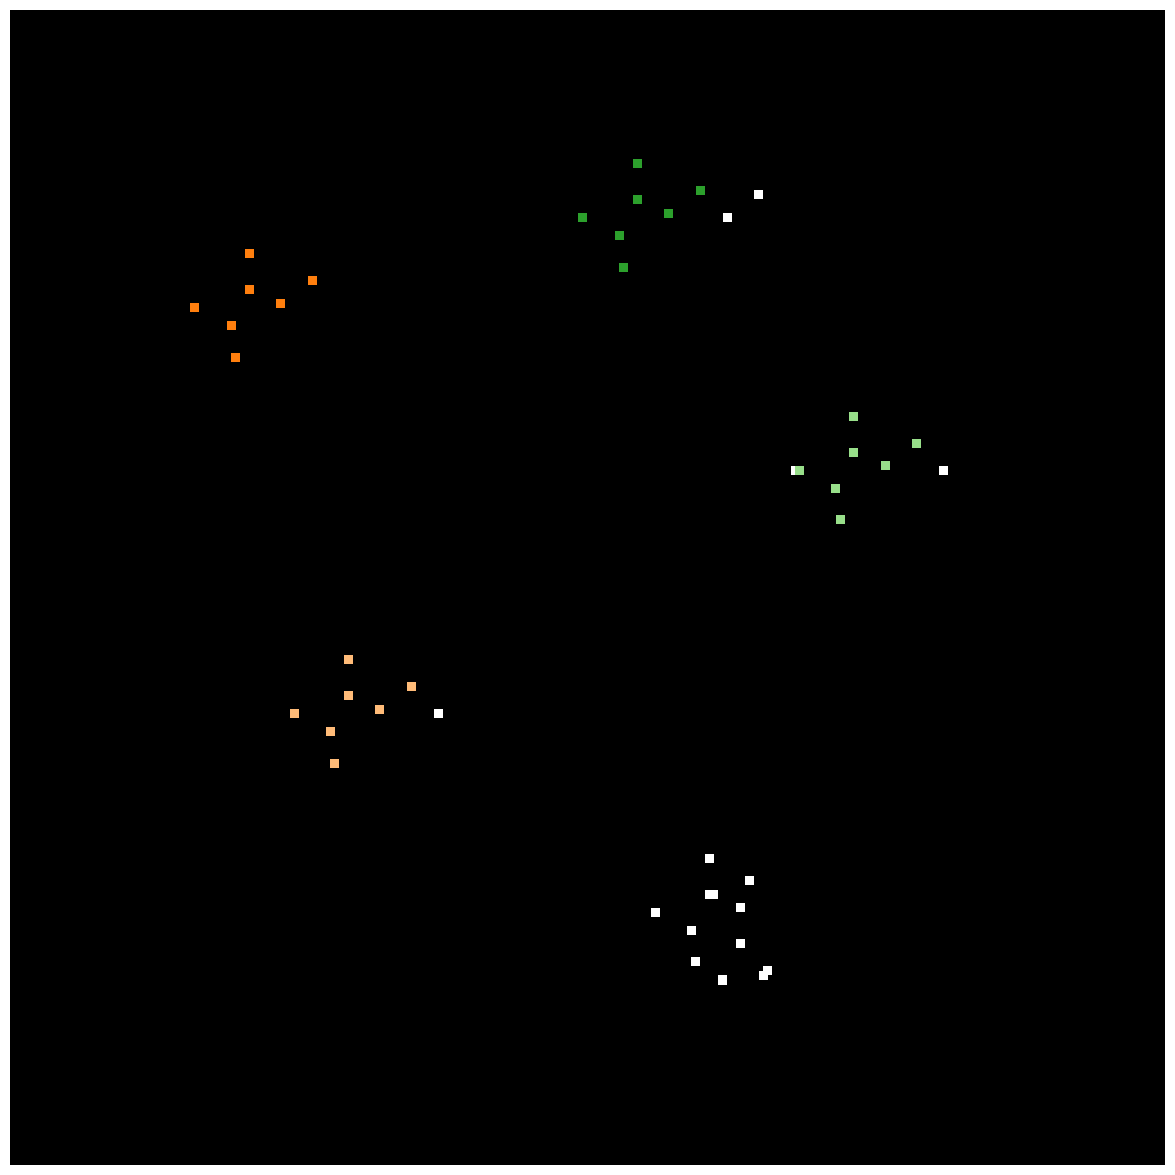

In [73]:
plot_constellations(level7['max_constellations'], ps)

Plot the largest repeating pattern of 6 squares. There are 5 of those.

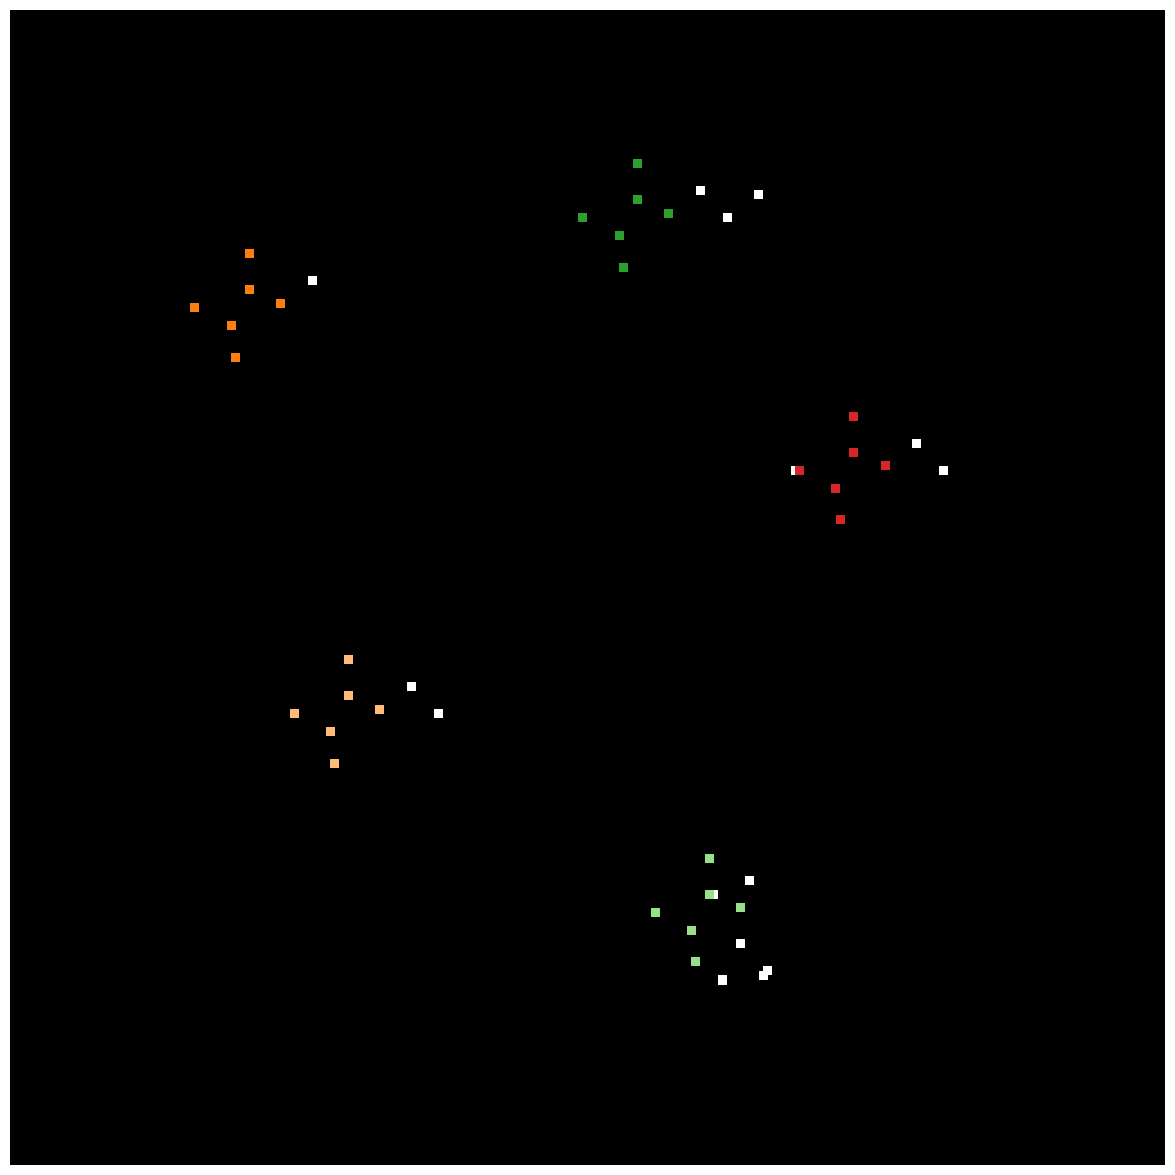

In [74]:
plot_constellations(level6['max_constellations'], ps)

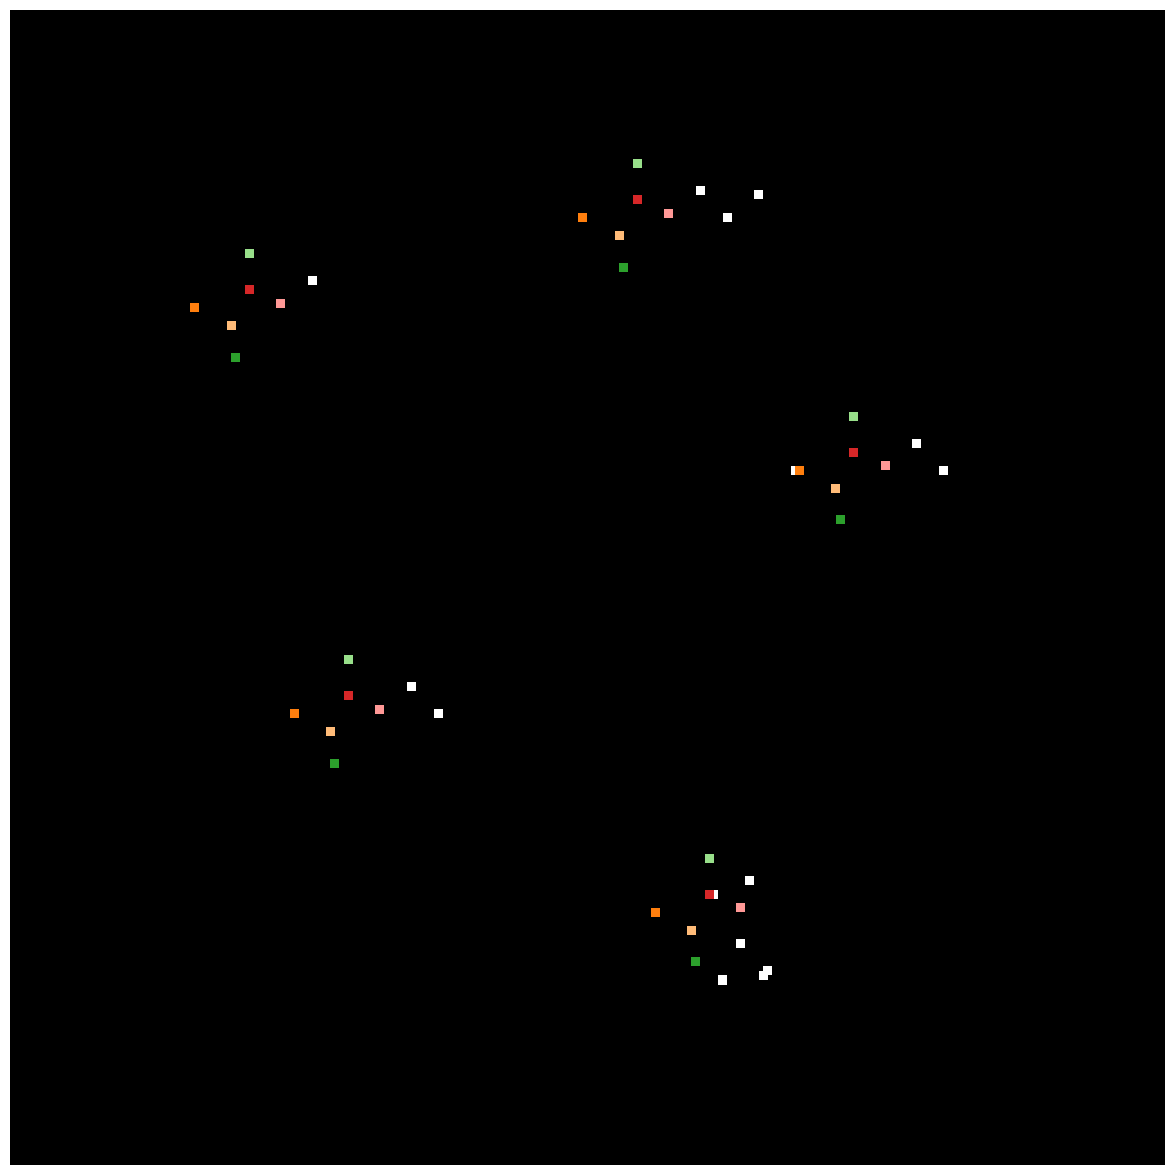

In [75]:
plot_constellations(level5['max_constellations'], ps)

We can repeat this process for the single points (nothing much there).

In [78]:
ps = [[x] for x in non_squares]

ps2 = merge_one_level2(ps,ps)
level2 = compute_distances_map(ps2)
print(len(level2['constellations']))
#print(level2)

Threshold: 100%|██████████| 43410/43410 [00:00<00:00, 3566107.23it/s]

42088


In [79]:
ps3 = merge_one_level2(level2['constellations'],ps)
level3 = compute_distances_map(ps3)
print(len(level3['constellations']))
#print(level3)

Threshold: 100%|██████████| 11750660/11750660 [00:03<00:00, 3011318.86it/s]


838


In [80]:
ps4 = merge_one_level2(level3['constellations'],ps)
level4 = compute_distances_map(ps4)
print(len(level4['constellations']))

Threshold: 100%|██████████| 367536/367536 [00:00<00:00, 3647819.83it/s]

0


If we plot these there is nothing interesting to see. Largest multiple is 5 versions of 3 points.

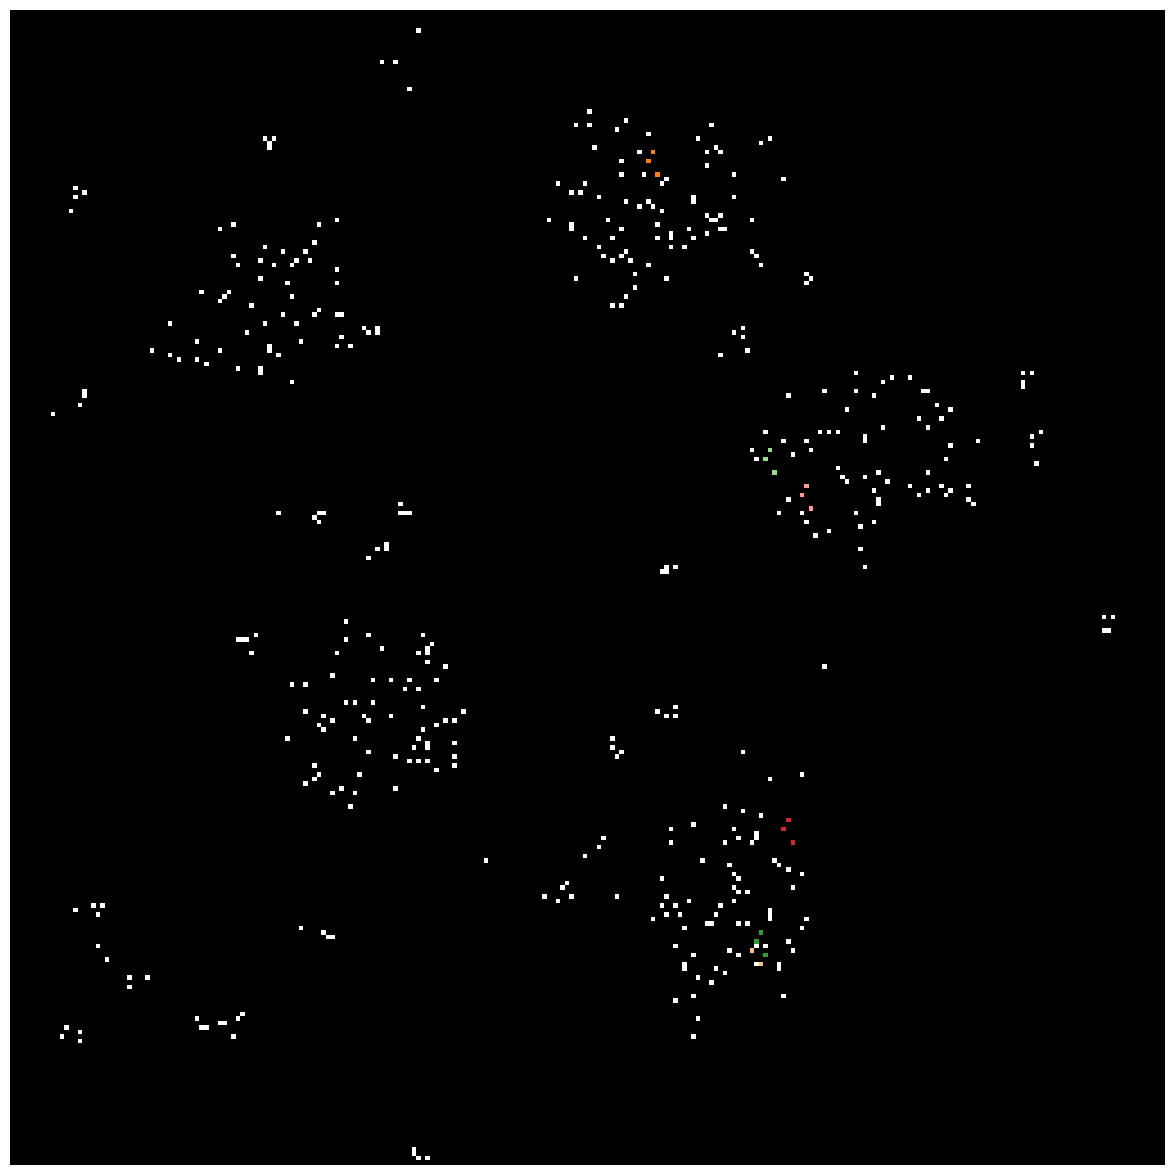

In [81]:
plot_constellations2(level3['max_constellations'], ps)

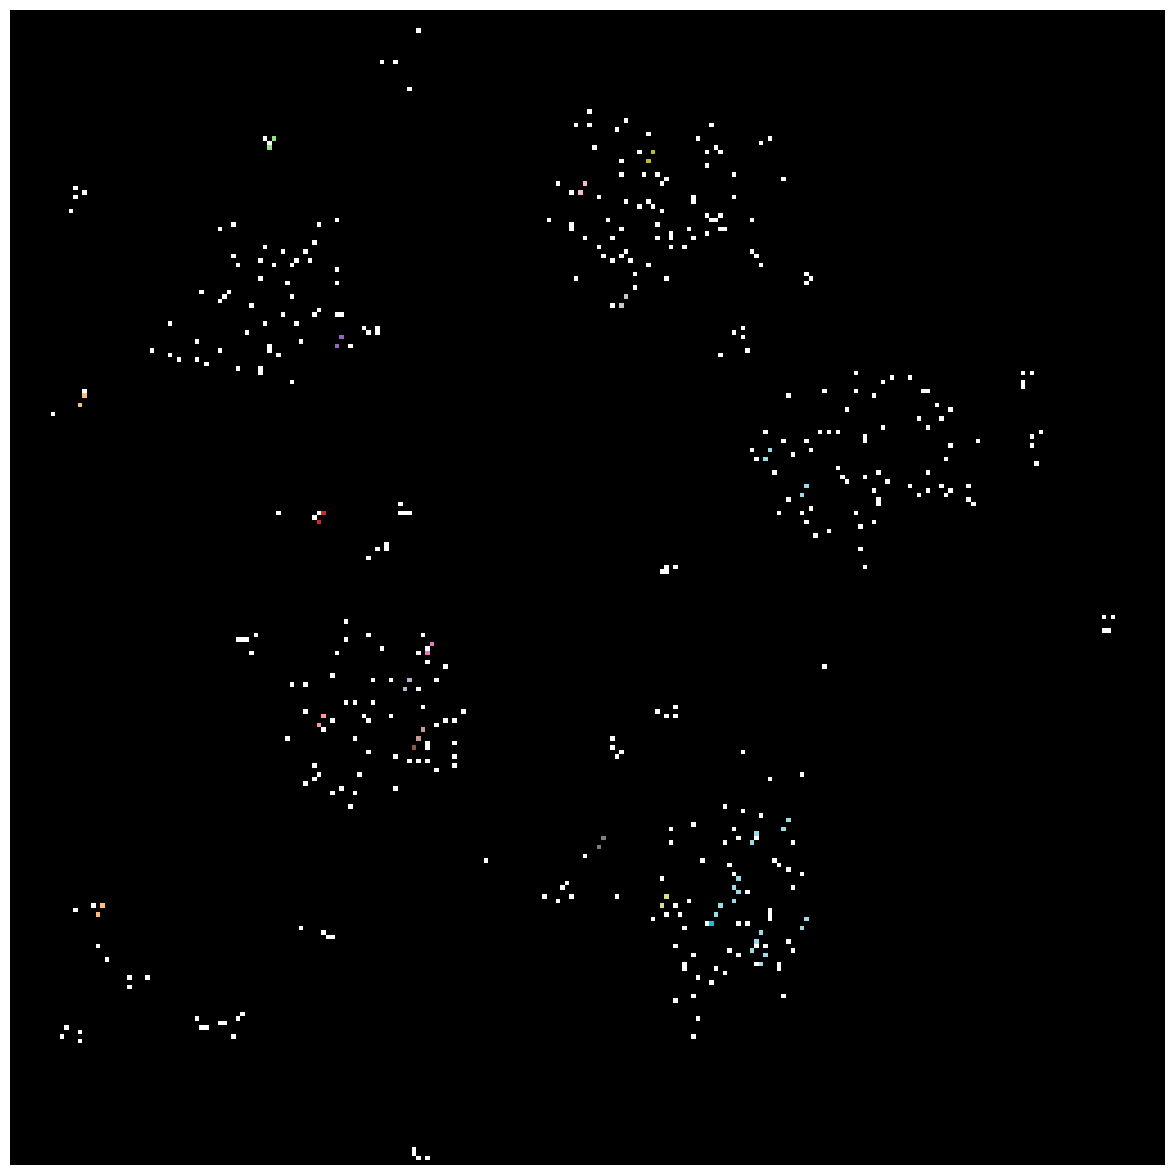

In [82]:
plot_constellations2(level2['max_constellations'], ps)

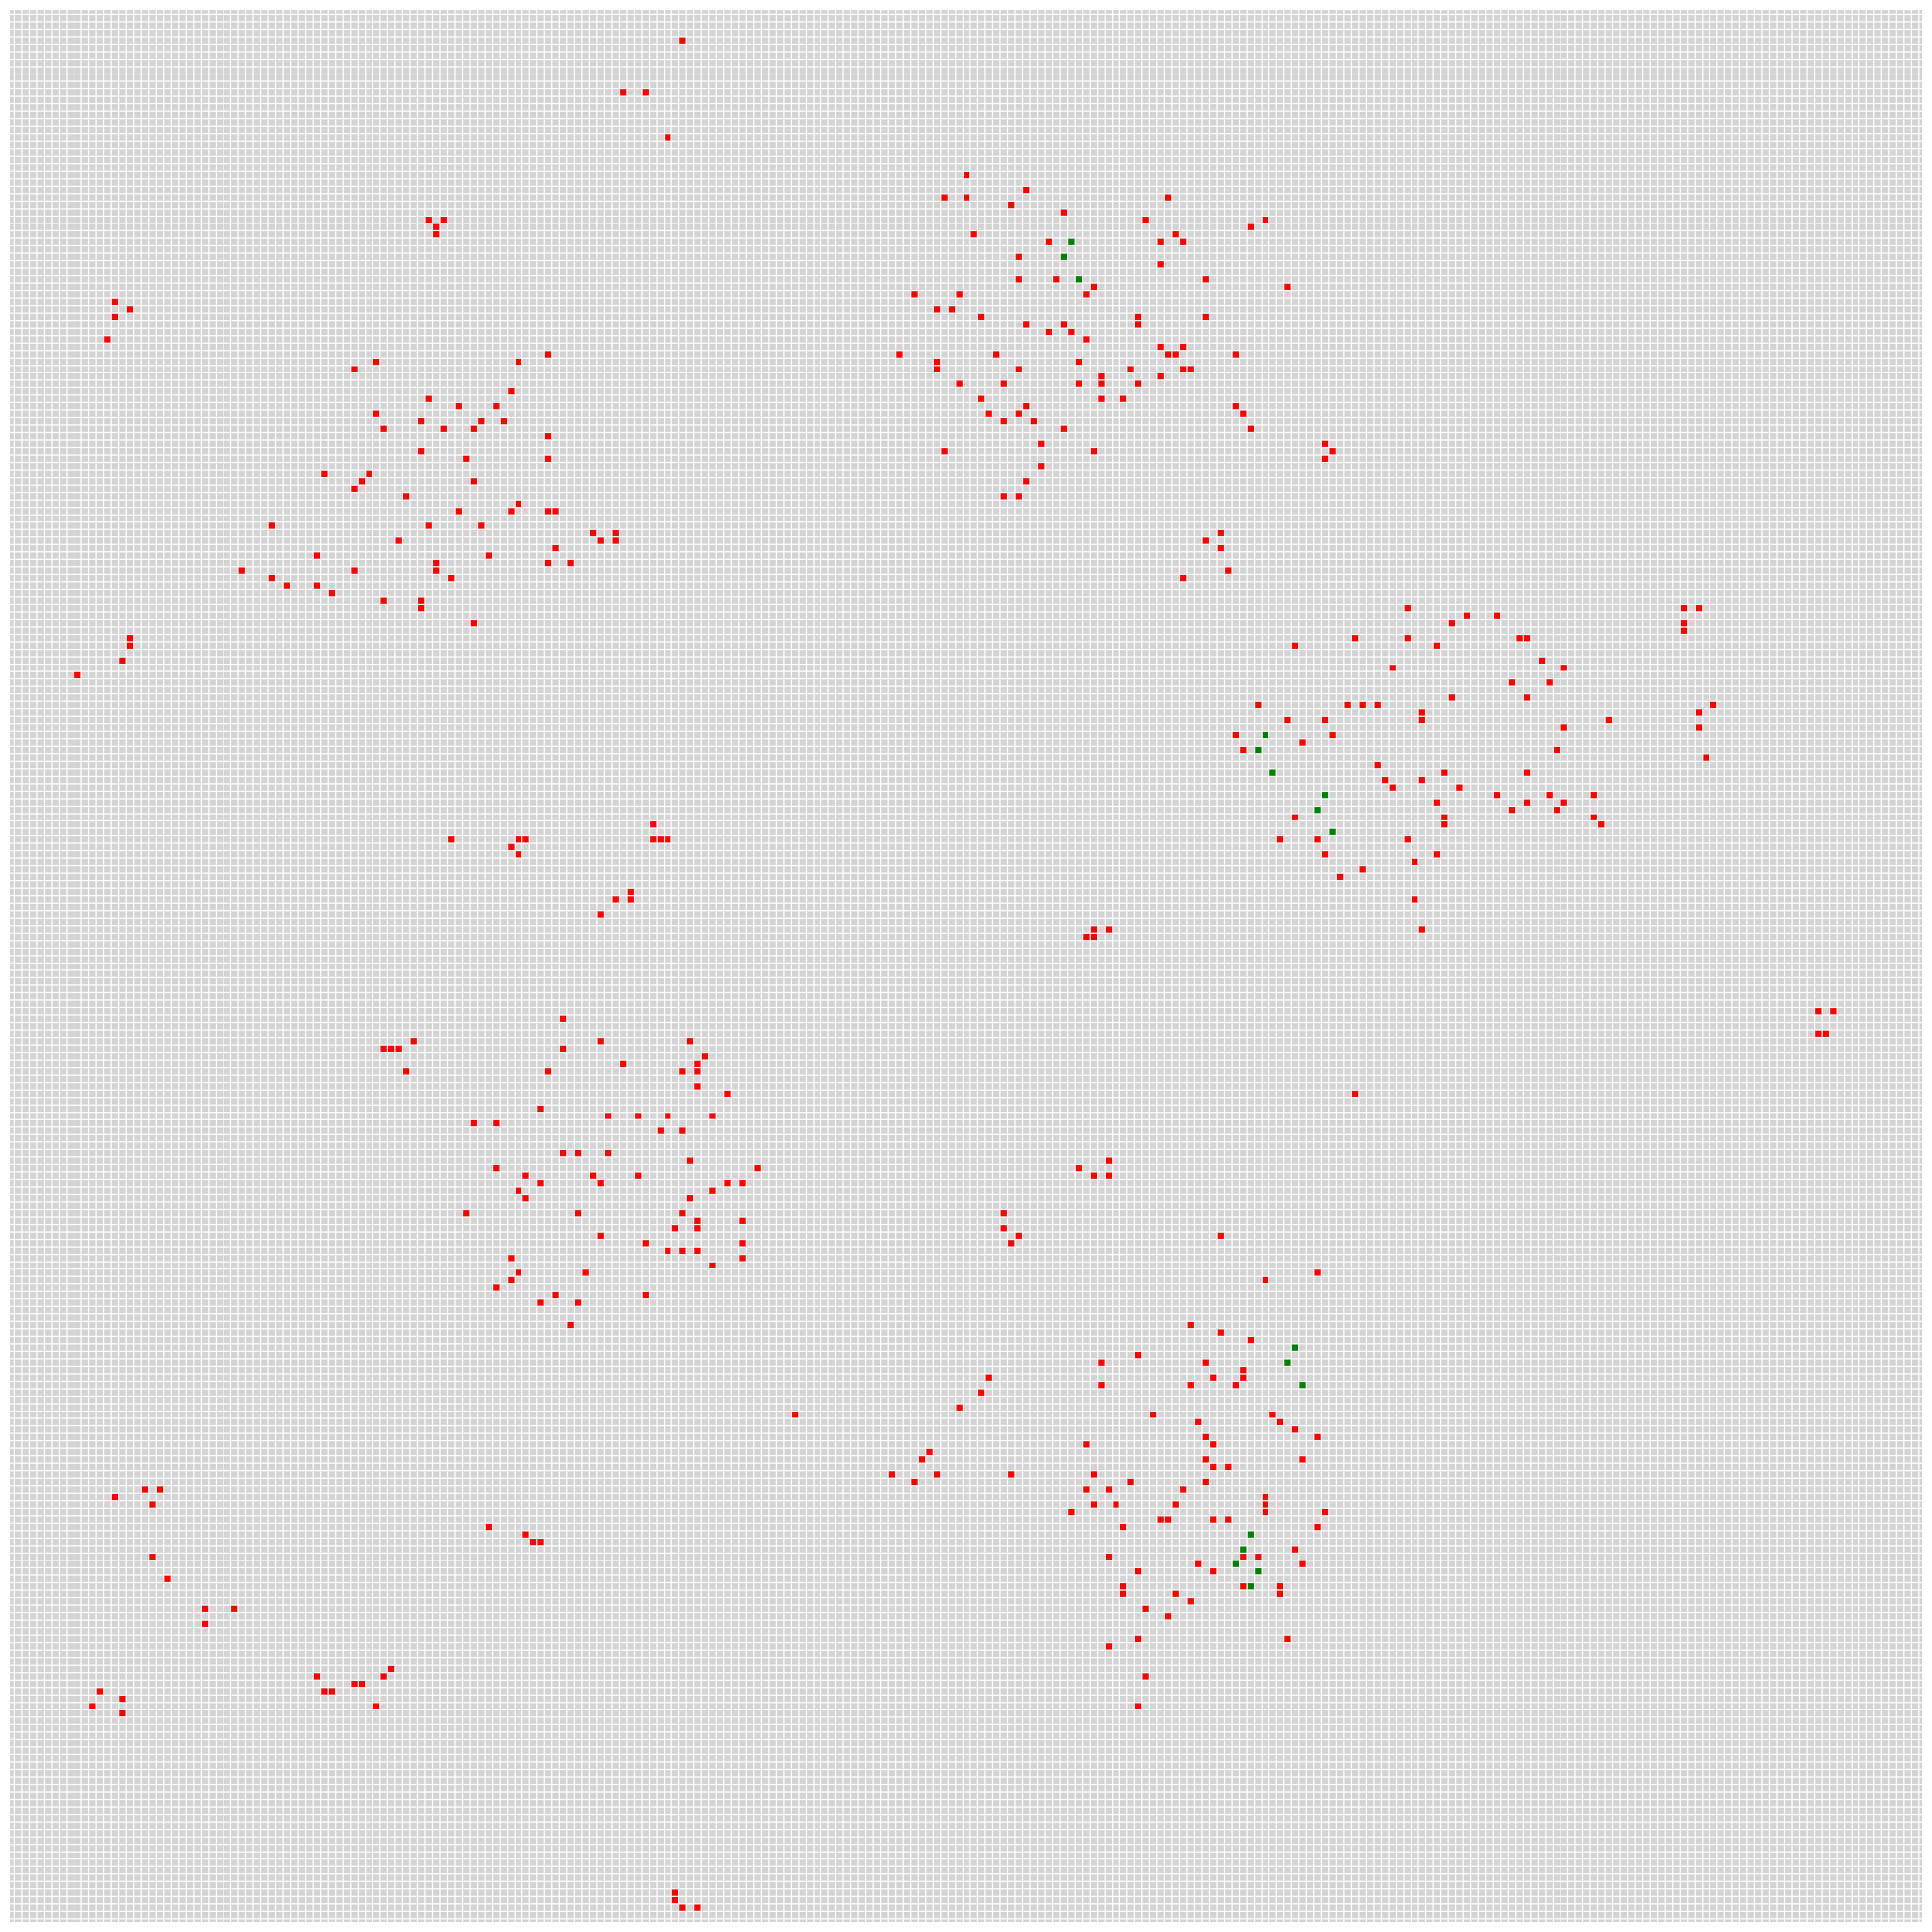

In [83]:
plot_constellations2_grid(level3['max_constellations'], ps)

# Idea: If the 5 different groups of dots relate to views in space

We are missing a third dimension. We might get it back if we assign a z-coordinate to each point and rotate them in space to that we get a fit of the 5 groups of dots onto each other. The missing dots might be the points that are hidden by other points. 